In [54]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
activation_path = './GLM/activation.pickle'
beta_path = './GLM/beta.pickle'
truth_path = './Data/beta_truth/Beta_tfMRI_MOTOR_LR_Glasser360.mat'

In [142]:
activation = np.load(activation_path, allow_pickle = True)
beta = np.load(beta_path, allow_pickle = True)
truth = scipy.io.loadmat(truth_path)
truth = truth['Beta']
truth = np.swapaxes(truth, 2, 0)

In [143]:
beta.shape

(100, 379, 5)

In [144]:
truth.shape

(100, 379, 5)

In [149]:
beta[0,1,:]

array([ 0.64571135,  0.20915649,  0.32412457, -0.08389531,  0.76748268])

In [150]:
truth[0,1,:]

array([-0.32281229,  0.02908194,  0.0939077 , -0.59354388,  0.13111449])

In [151]:
m, n, r = beta.shape
arr = np.column_stack((np.repeat(np.arange(m),n),beta.reshape(-1, beta.shape[-1])))
df = pd.DataFrame(arr)
df.rename(columns={df.columns[0]: "subject" }, inplace=True)

In [152]:
df

,subject,1,2,3,4,5
0,0.0,0.823382,1.264593,0.859434,0.633950,0.726995
1,0.0,0.645711,0.209156,0.324125,-0.083895,0.767483
2,0.0,-0.160784,0.545954,0.502011,0.230917,0.155272
3,0.0,0.838640,1.151934,0.866444,0.469562,0.853789
4,0.0,1.067913,1.147047,0.809226,0.465858,0.858235
...,...,...,...,...,...,...
37895,99.0,-0.170453,0.440746,0.035716,0.040898,0.582383
37896,99.0,0.073248,0.607011,0.155428,0.352440,0.721735
37897,99.0,0.183241,0.433418,-0.122943,0.121283,0.415079
37898,99.0,0.434251,0.310374,0.321902,-0.064321,0.505038


<AxesSubplot:>

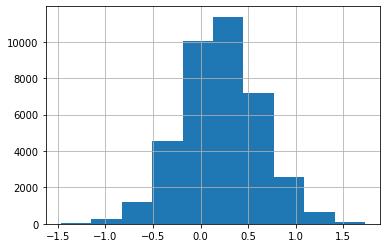

In [153]:
df[1].hist()

In [154]:
m, n, r = truth.shape
arr = np.column_stack((np.repeat(np.arange(m),n),truth.reshape(-1, truth.shape[-1])))
df_t = pd.DataFrame(arr)
df_t.rename(columns={df_t.columns[0]: "subject" }, inplace=True)

In [155]:
df_t

,subject,1,2,3,4,5
0,0.0,-0.254942,-0.637669,-0.052952,0.029350,-0.454532
1,0.0,-0.322812,0.029082,0.093908,-0.593544,0.131114
2,0.0,-0.622510,-0.364706,-0.164954,0.107074,-0.034593
3,0.0,-0.284301,-0.475949,0.024050,-0.035999,-0.426032
4,0.0,-0.318083,-0.576688,0.205820,0.039195,-0.436967
...,...,...,...,...,...,...
37895,99.0,-0.075156,-0.081275,-0.282101,0.090821,-0.090378
37896,99.0,0.058744,0.032962,-0.437506,0.048232,0.056889
37897,99.0,-0.034029,0.023332,-0.203585,0.007171,-0.419598
37898,99.0,-0.049654,0.289397,0.436186,-0.820580,-0.176926


<AxesSubplot:>

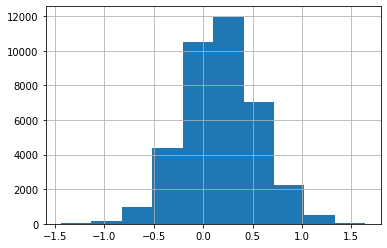

In [126]:
df_b[5].hist()

In [158]:
(df[1]-df_t[1]).sum()

7470.538665282393

In [167]:
df[5].corr(df_t[5])

0.2299896712566481